# Deep Learning

## Project: Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

#Number of training examples
n_train = len(X_train)

#Number of testing examples.
n_test = len(X_test)

# Shape of the traffic sign image(Resized to 32 * 32)
image_shape = (X_train.shape[1], X_train.shape[2])

# unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


###  Exploratory visualization of the dataset

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
%matplotlib inline
import random

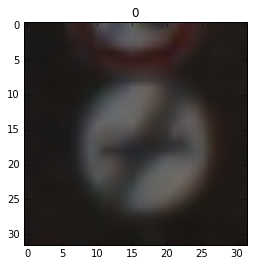

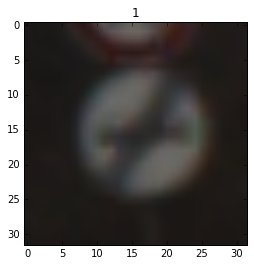

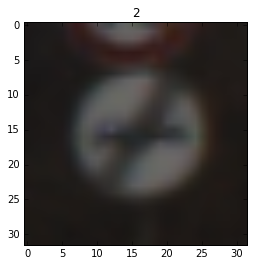

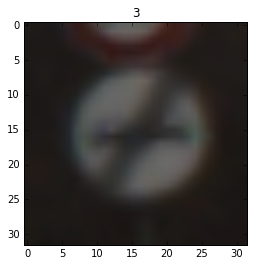

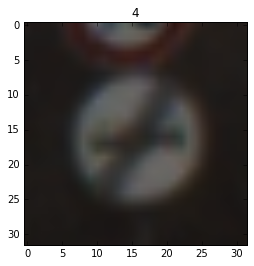

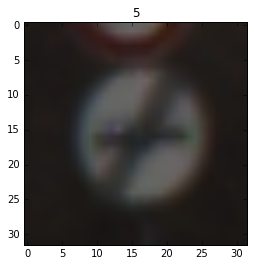

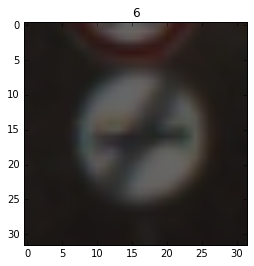

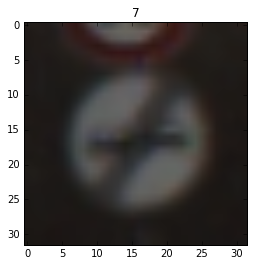

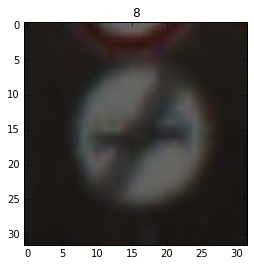

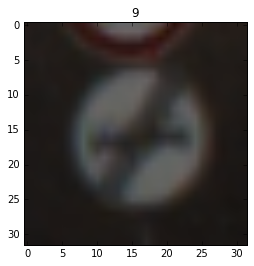

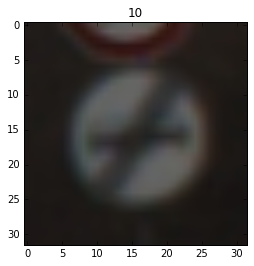

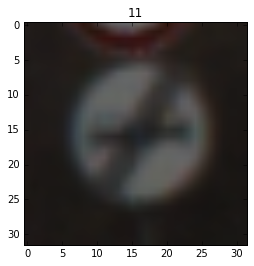

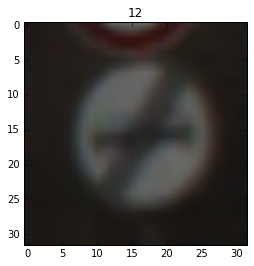

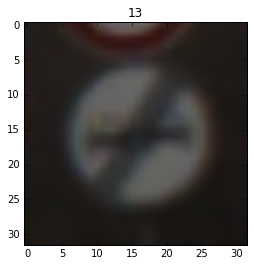

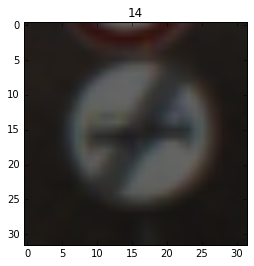

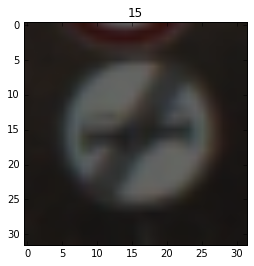

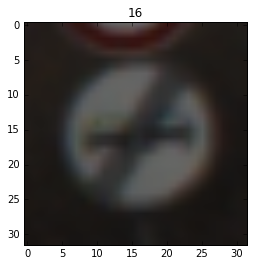

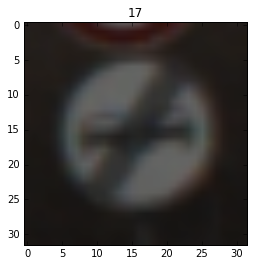

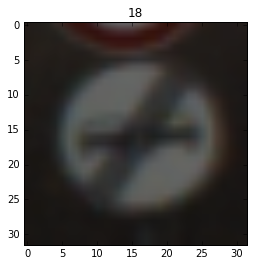

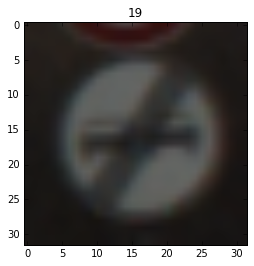

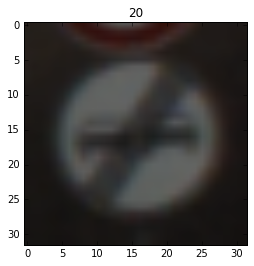

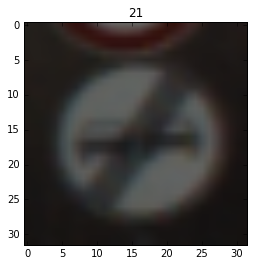

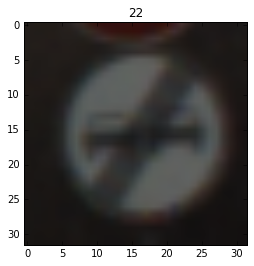

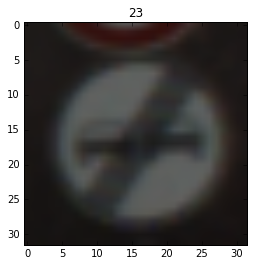

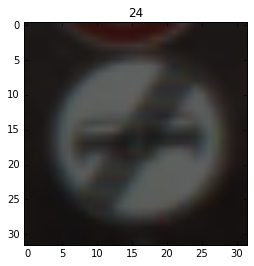

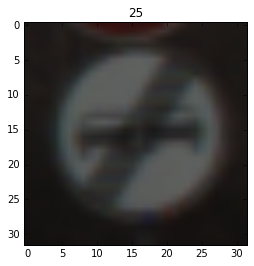

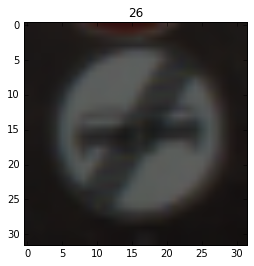

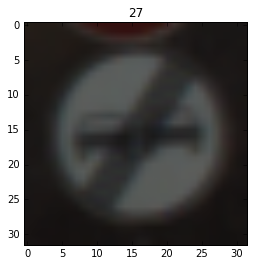

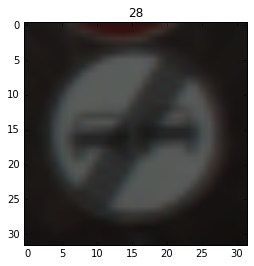

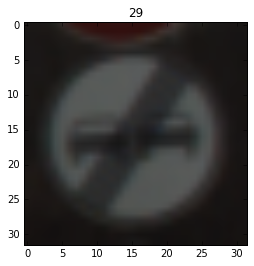

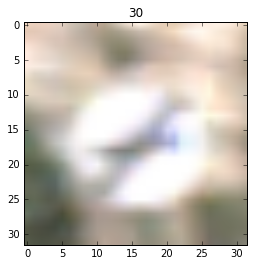

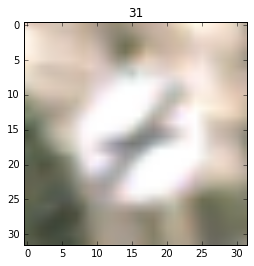

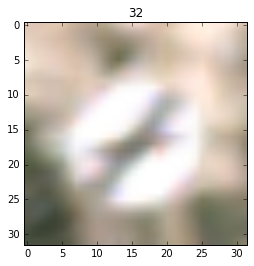

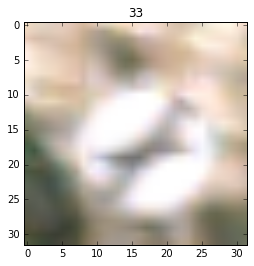

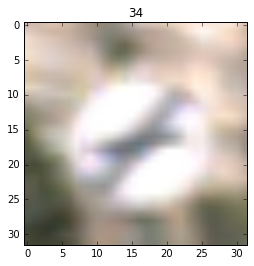

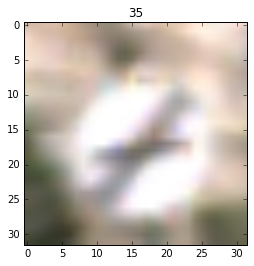

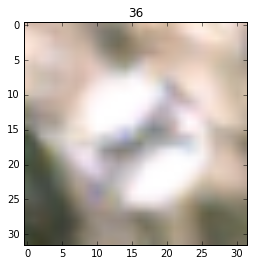

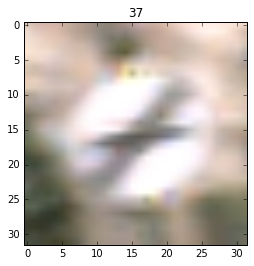

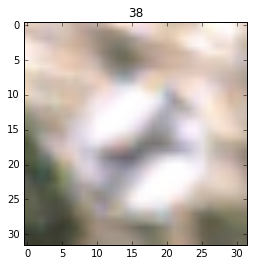

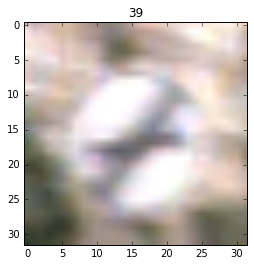

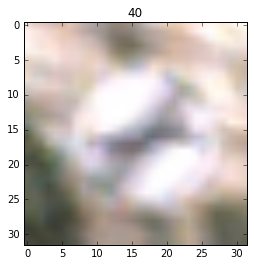

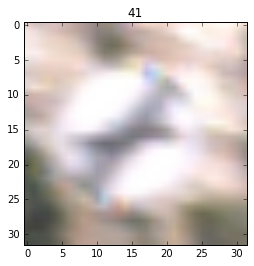

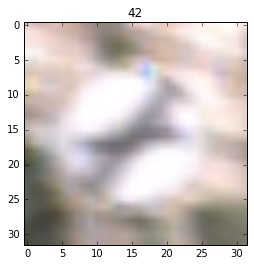

In [4]:


#Display the image from the training set
for i in range(0,n_classes):
    image = X_train[i].squeeze()
    plt.imshow(image)
    plt.title(i)
    plt.show()    
    
    

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

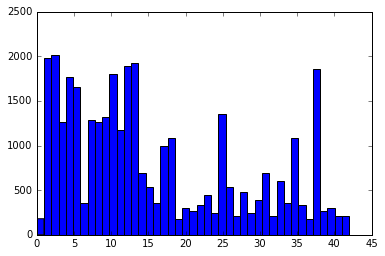

In [5]:
# Distribution of the training images per class
plt.hist(y_train, bins = n_classes)

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

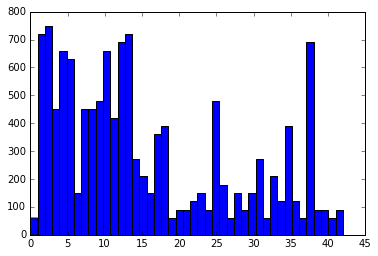

In [6]:
# Distribution of the test images per class 
plt.hist(y_test, bins = n_classes)

In [7]:
import collections

max_ele = max(collections.Counter(y_train).items(), key=lambda x: x[1])
print("The maximum (label, count) from the training sample set \n" , max_ele)

min_ele = min(collections.Counter(y_train).items(), key=lambda x: x[1])
print("The minimum (label, count) from the training sample set \n", min_ele)

The maximum (label, count) from the training sample set 
 (2, 2010)
The minimum (label, count) from the training sample set 
 (0, 180)


----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

In [8]:
# Data preprocessing: Conversion to grayscale, normalization..
import cv2
def normalize(X):                                                                                                                                                                                                                                   
    #train_mean = np.mean(X)
    #normalized_train = X / train_mean
    return X / 255 * 0.8 + 0.1

def grayscale(X):
    return cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)

def resize(image):
    return np.reshape(image, image.shape + (1,))

In [9]:
# Preprocess test and training data
def preprocess_images(data):
    gray_images = []
    for image in data:
        gray_image = grayscale(image)
        gray_image = resize(gray_image)
        gray_images.append(gray_image)
    return np.array(gray_images)

In [10]:
#Preprocess the training data!
gray_train = preprocess_images(X_train)
normalized_train = normalize(gray_train)

In [11]:
# Preprocess the testing data 
gray_test = preprocess_images(X_test)
normalized_test = normalize(gray_test)

In [12]:
from sklearn.utils import shuffle
normalized_train, y_train = shuffle(normalized_train, y_train)

Set up the tensorflow

In [13]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

### Model Architecture
*************************************************

Implementation of LeNet architecture 

----------------------------------------------------

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
  
    # Normaliztion 
    normalized = tf.nn.local_response_normalization(conv1)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(normalized, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Normaliztion 
    normalized_2 = tf.nn.local_response_normalization(conv2)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(normalized_2)
  
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1   = tf.nn.relu(fc1)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits,conv2


In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

In [16]:
### Preparing and training the model 
rate = 0.005
logits,conv2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    tf.add_to_collection('vars', conv2)
    print("Training...")
    print()
    for i in range(EPOCHS):      
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = normalized_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(normalized_test, y_test) 
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.810

EPOCH 2 ...
Validation Accuracy = 0.878

EPOCH 3 ...
Validation Accuracy = 0.901

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.911

EPOCH 11 ...
Validation Accuracy = 0.906

EPOCH 12 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.913

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 15 ...
Validation Accuracy = 0.917

Model saved


In [19]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    preprocess_X = preprocess_images(X_valid)
    preprocess_X = normalize(preprocess_X)
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: preprocess_X, y: y_valid})
print('Test Accuracy: {}'.format(test_accuracy))


Test Accuracy: 0.9374149441719055


---

## Step 3: Test a Model on New Images

Testing the model on unseen german traffic signs downloaded from the web

### Load and Output the Images

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2
import os
image_loc = "new_images/"
unseen_images = []
for images in os.listdir(image_loc):
    image = mpimg.imread(image_loc + images)
    img = cv2.resize(image, (32,32))
    unseen_images.append(img) 


In [21]:
import numpy as np
unseen_images = np.array(unseen_images)
print(unseen_images.shape)

(4, 32, 32, 3)


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import pandas as pd 
sign_classes = pd.read_csv("/Users/bbhask002c/Desktop/TrafficSign/signnames.csv")
sign_classes = sign_classes.drop('ClassId',axis = 1)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    pre_X = preprocess_images(unseen_images)
    pre_X = normalize(pre_X)
    pred_sign = sess.run(logits, feed_dict={x: pre_X})
    predictions = sess.run(tf.argmax(pred_sign,1))

In [23]:
signs = sign_classes.values.tolist()
for i in range(4):
    print(signs[predictions[i]])

['Go straight or left']
['Priority road']
['Yield']
['Speed limit (30km/h)']


### Analyze Performance

In [24]:
### Calculate the accuracy for unseen images
y = np.array([37,12,13,0])
acc_score = 0
for i in range(4):
    actual = predictions[i]
    if actual == y[i]:
        acc_score += 1
print("Accuracy score", acc_score/len(unseen_images) * 100)



Accuracy score 75.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.


In [25]:
### Top 5 Softmax for unseen images 
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top_fivevalues = sess.run(tf.nn.top_k(tf.nn.softmax(pred_sign), k=5))
    print(top_fivevalues)

TopKV2(values=array([[  9.99898791e-01,   6.24853565e-05,   3.74044103e-05,
          8.09550272e-07,   2.90806469e-07],
       [  9.99787033e-01,   2.12670609e-04,   2.35834179e-07,
          1.71294836e-08,   6.32325659e-09],
       [  9.99999404e-01,   5.56949772e-07,   2.10334594e-08,
          6.60820421e-09,   2.69511219e-10],
       [  5.41545689e-01,   4.55888480e-01,   2.44163838e-03,
          7.34452478e-05,   1.42037934e-05]], dtype=float32), indices=array([[37,  8, 39, 40, 35],
       [12,  2, 40, 11,  1],
       [13, 15,  8,  2,  1],
       [ 1,  2, 40, 38,  7]], dtype=int32))


---

## Step 4: Visualize the Neural Network's State with Test Images

Plot feature maps to see what characteristics of an image the network finds interesting.


 


In [26]:
### Visualizing network's feature maps here.
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # preprocess the images  
    image_input = preprocess_images(image_input)
    image_input = normalize(image_input)
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

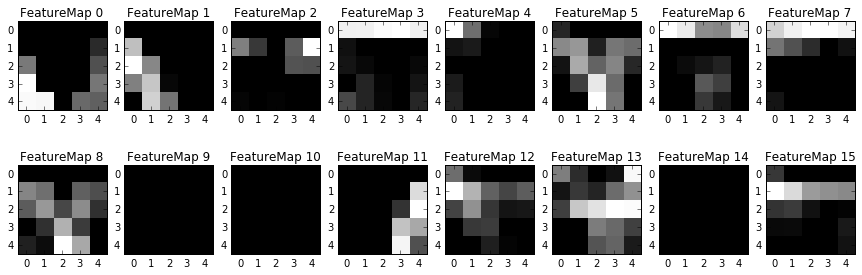

In [29]:
image_loc = "new_images/3.jpg"
input_images = []
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    conv2 = tf.get_collection('vars')
    input_image = mpimg.imread(image_loc)
    input_images.append(input_image)
    outputFeatureMap(input_images,conv2[0])
   

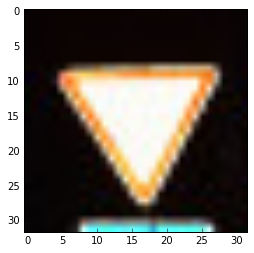

In [30]:
plt.imshow(input_image)

###  9

Discussion: how feature maps learns to look for interesting characteristics in traffic sign images 


1. The convolution layers can be evaulated to determine and plot the feature maps 
2. Preprocess the randomly selected German traffic signs from the website
3. Preprocessing steps include converting the image from color to grayscale and normalizing 
4. To the function "outputFeature Map" above pass the image input along with the variables representing the convolution layers after activation 
5. The layer's shape can be determined from the LeNet function module above 
6. From the "conv2" layer's inspection, we can observe that there are 16 Feature maps 
7. Each feature nears new characterstic of traffic sign, in our example, learns features of the yield sign